In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Audio1_file = "Pakistan.wav"
Audio2_file = "Name.wav"

## Testing file with size

In [3]:
audio, sr = librosa.load(Audio1_file)
print("Sampling Rate is ",sr)
print("File has ", len(Audio1_file) ,"   samples")
print("File Data is ",Audio1_file)

Sampling Rate is  22050
File has  12    samples
File Data is  Pakistan.wav


In [4]:
audio2, sr = librosa.load(Audio2_file)
print("Sampling Rate is ",sr)
print("File has ", len(Audio2_file) ,"   samples")
print("File Data is ",Audio2_file)

Sampling Rate is  22050
File has  8    samples
File Data is  Name.wav


In [5]:
ipd.Audio(Audio1_file)

In [6]:
ipd.Audio(Audio2_file)

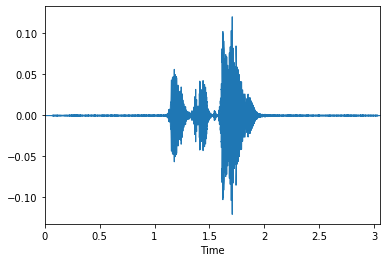

In [7]:
librosa.display.waveplot(audio)

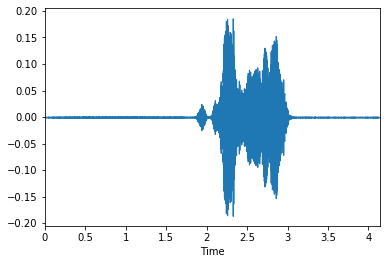

In [8]:
librosa.display.waveplot(audio2)

# Frequency Domain Analysis

In [9]:
def frequency_domain_analysis_pak():
    fft1 = np.fft.fft(audio)
    mag1 = np.absolute(fft1)
    freq1 = np.linspace(0, sr, len(mag1))
    plt.plot(freq1, mag1)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.show()

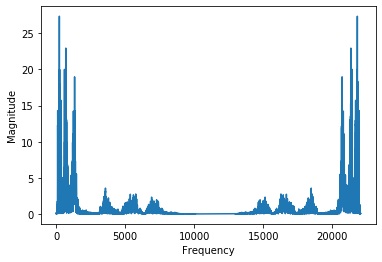

In [10]:
frequency_domain_analysis_pak()

In [11]:
def frequency_domain_analysis_name():
    fft2 = np.fft.fft(audio2)
    mag2 = np.absolute(fft2)
    freq2 = np.linspace(0, sr, len(mag2))
    plt.plot(freq2, mag2)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.show()

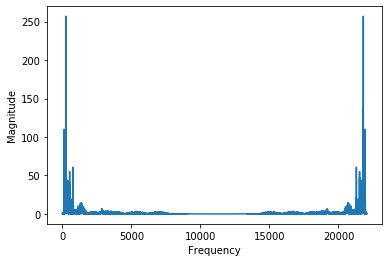

In [12]:
frequency_domain_analysis_name()

# Spectrogram

In [13]:
FRAME_SIZE = 2048
HOP_SIZE = 1024

In [14]:
S_scale = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale2 = librosa.stft(audio2, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_scale.shape

(1025, 66)

In [15]:
Y_scale = np.abs(S_scale) ** 2
Y_scale.shape

(1025, 66)

In [16]:
def plot_spectrogram(Y, sr, hop_length, y_axis="log"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

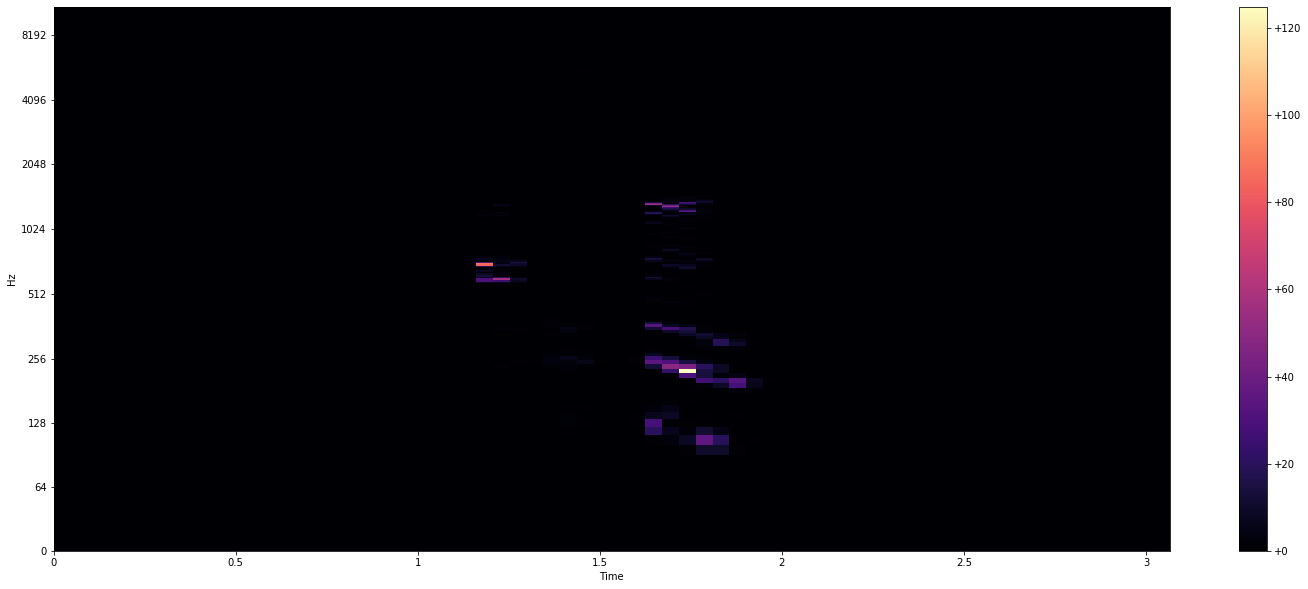

In [17]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

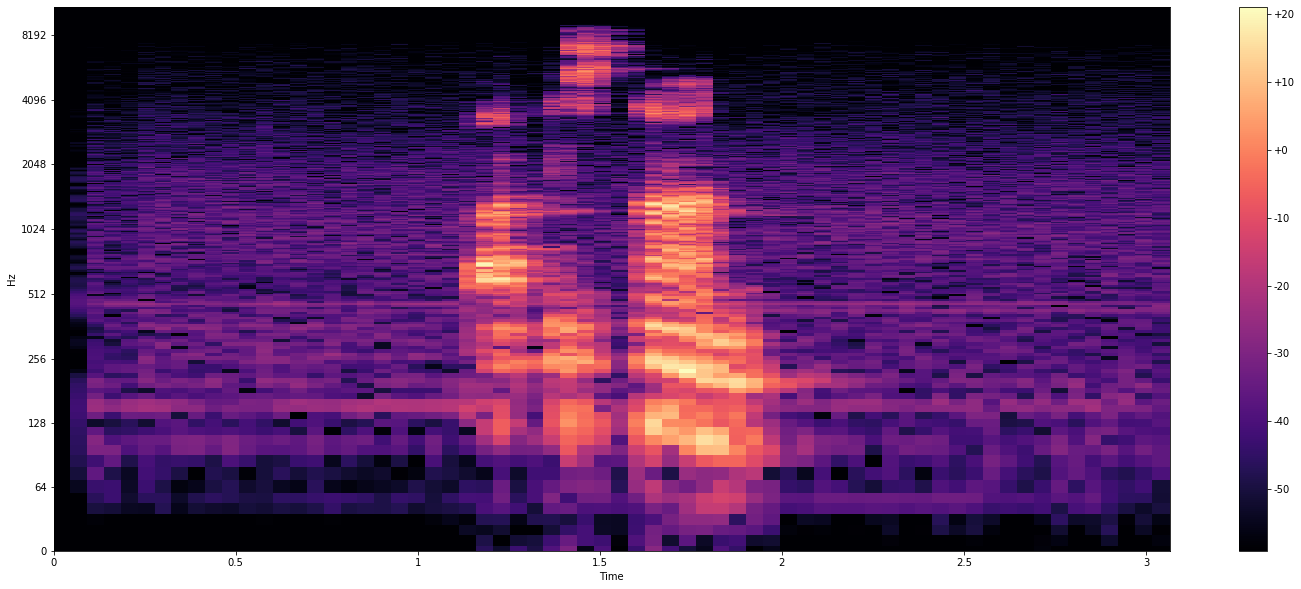

In [18]:
#Log Amplitude Spectrogram
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

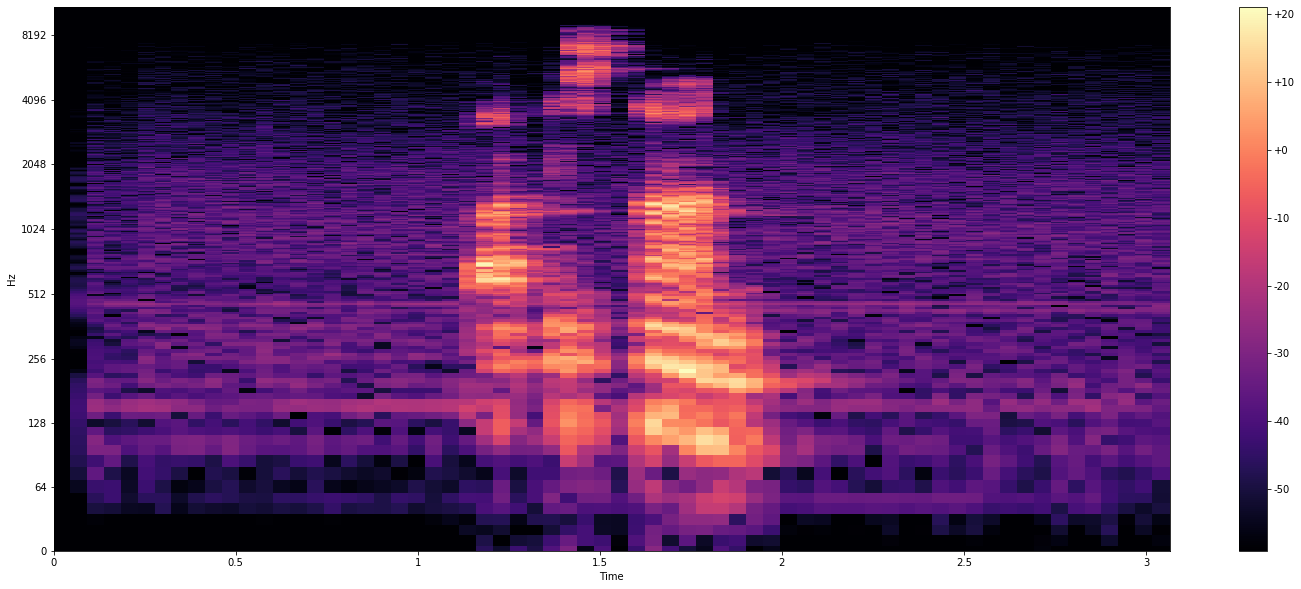

In [19]:
# Log Frequency Spectrogram
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [20]:
S_pak = librosa.stft(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_name = librosa.stft(audio2, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_pak = librosa.power_to_db(np.abs(S_pak) ** 2)
Y_name = librosa.power_to_db(np.abs(S_name) ** 2)

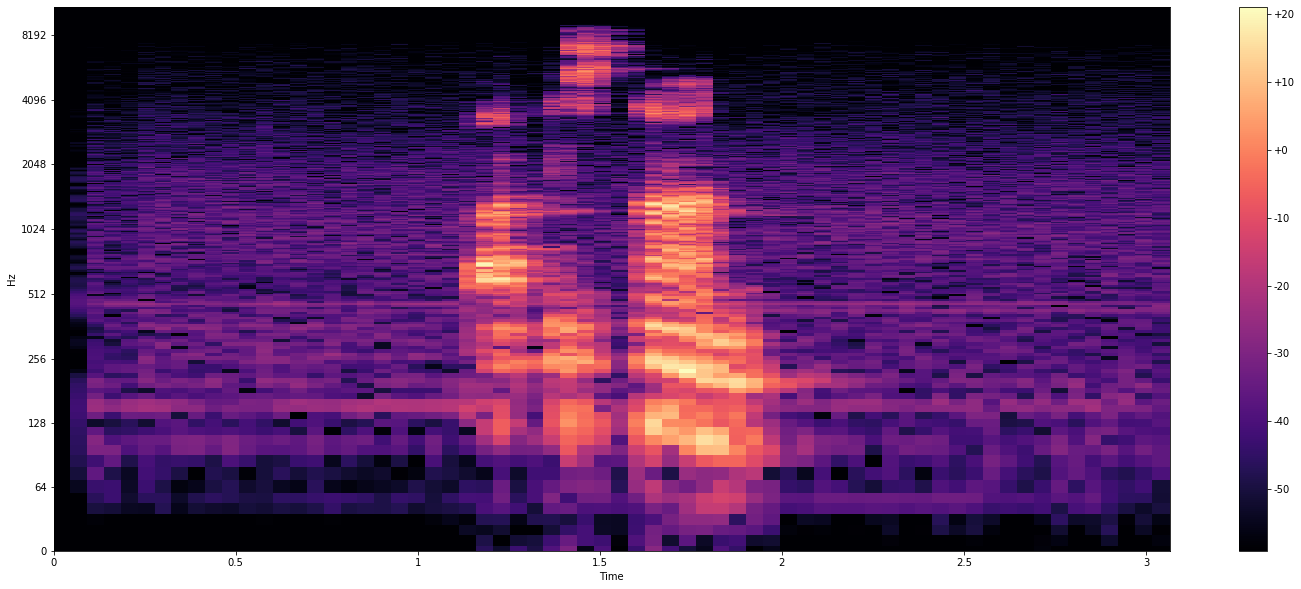

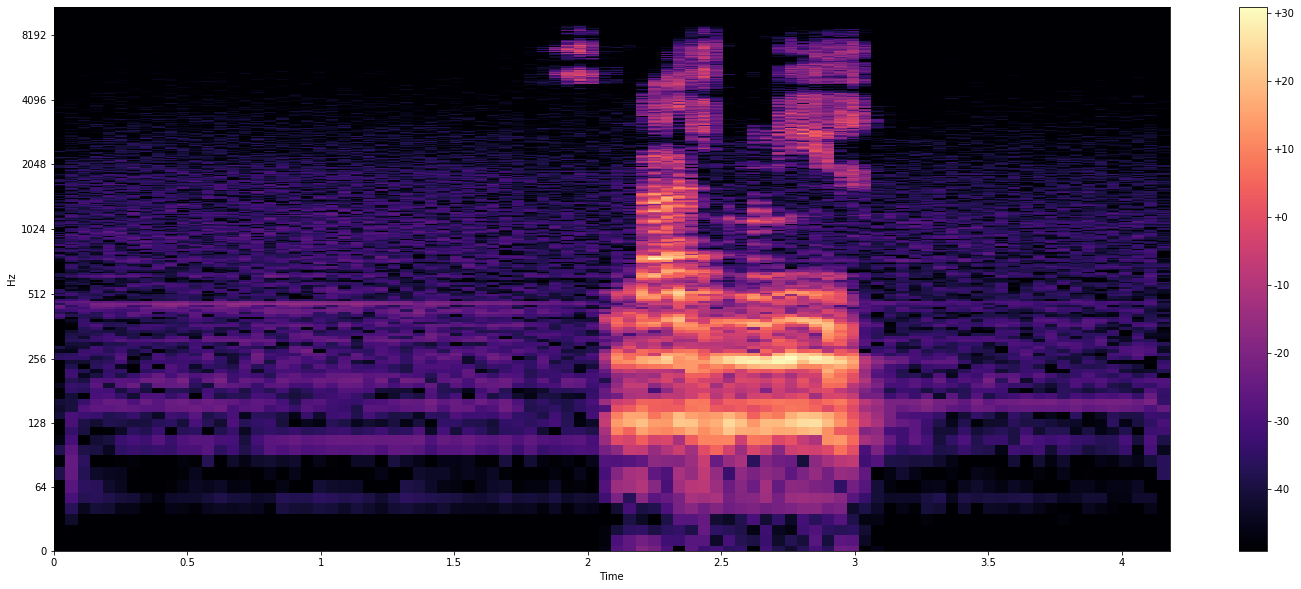

In [21]:
plot_spectrogram(Y_pak, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_name, sr, HOP_SIZE, y_axis="log")

# MFCC

In [22]:
def mfcc():
    mfcc1 = librosa.feature.mfcc(audio, n_fft=FRAME_SIZE, hop_length=HOP_SIZE,n_mfcc=13)
    # Visualizing MFCC
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfcc1, 
                             x_axis="time", 
                             sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

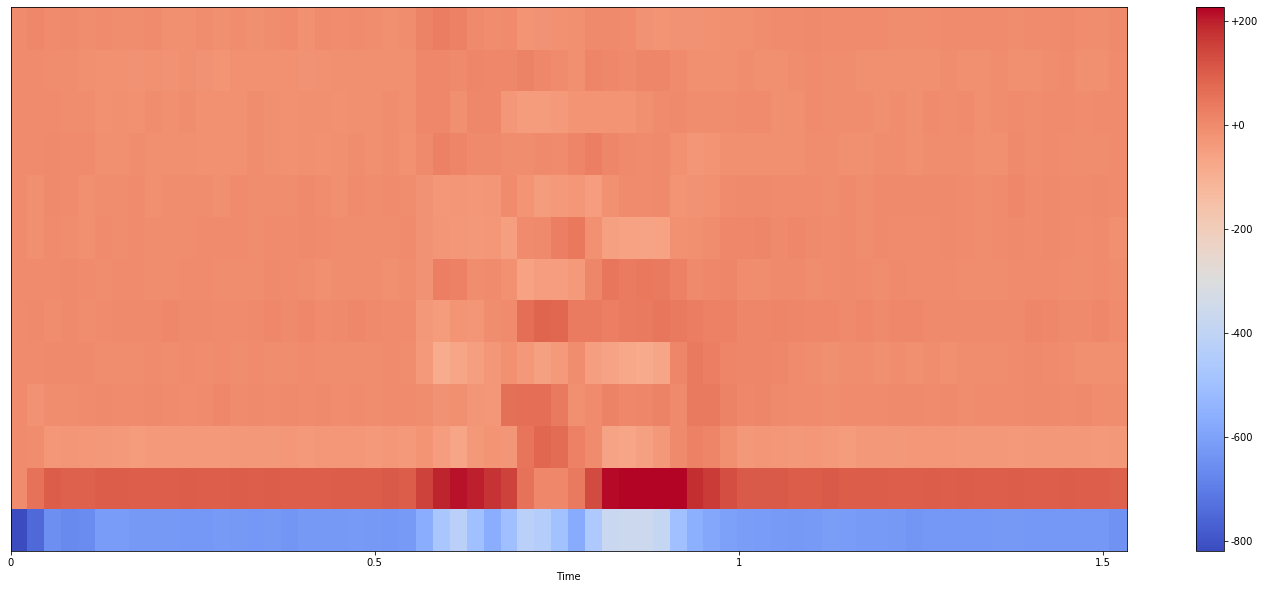

In [23]:
mfcc()

In [24]:
def mfcc_1():
    mfcc2 = librosa.feature.mfcc(audio2, n_fft=FRAME_SIZE, hop_length=HOP_SIZE,n_mfcc=13)
    # Visualizing MFCC
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(mfcc2, 
                             x_axis="time", 
                             sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

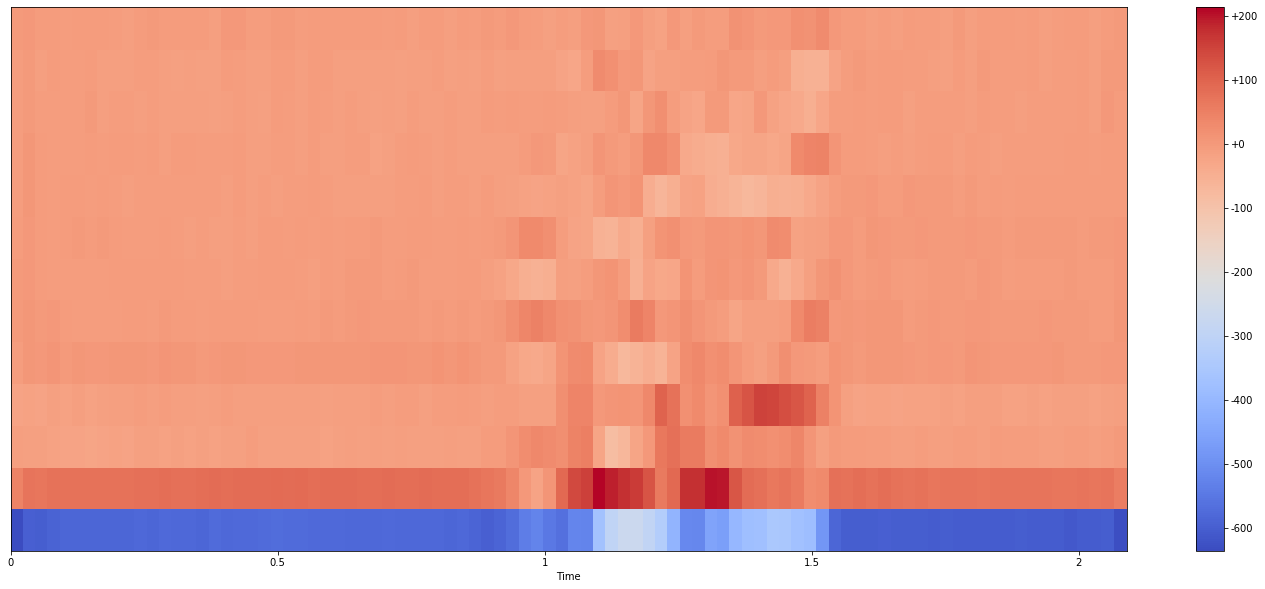

In [25]:
mfcc_1()

# MEL Spectrogram

In [26]:
def mel_spectrogram():
    mel_spectrogram = librosa.feature.melspectrogram(audio, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(log_mel_spectrogram, 
                             x_axis="time",
                             y_axis="mel", 
                             sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

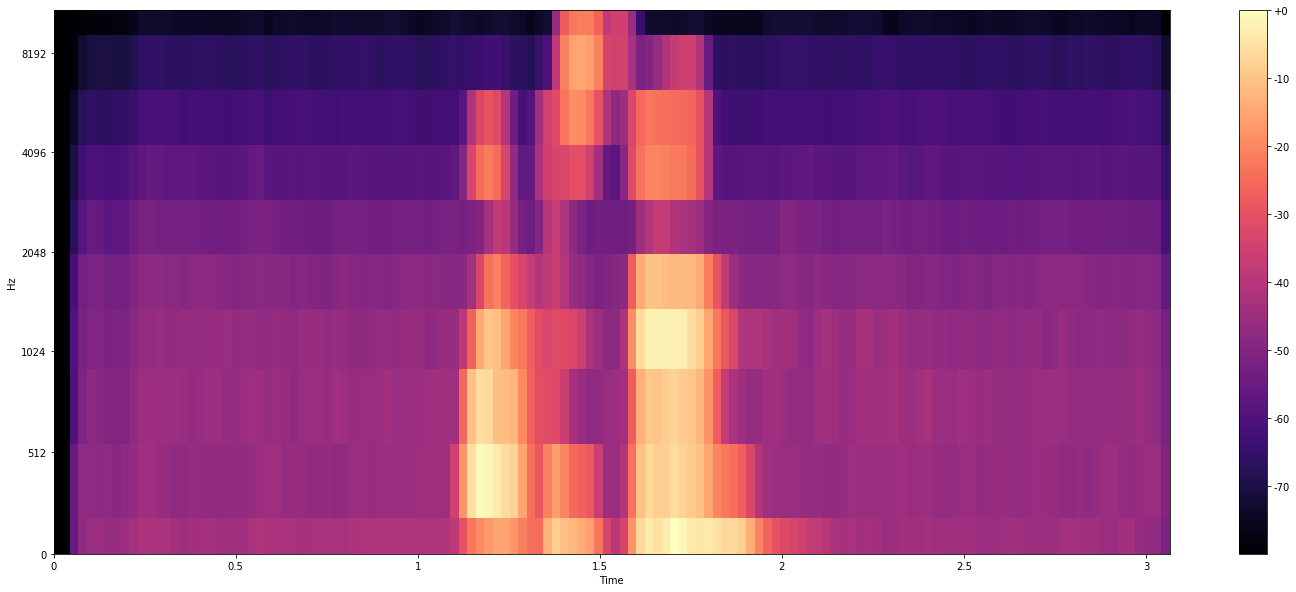

In [27]:
mel_spectrogram()

In [28]:
def mel_spectrogram2():
    mel_spectrogram = librosa.feature.melspectrogram(audio2, sr=sr, n_fft=2048, hop_length=512, n_mels=10)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(log_mel_spectrogram, 
                             x_axis="time",
                             y_axis="mel", 
                             sr=sr)
    plt.colorbar(format="%+2.f")
    plt.show()

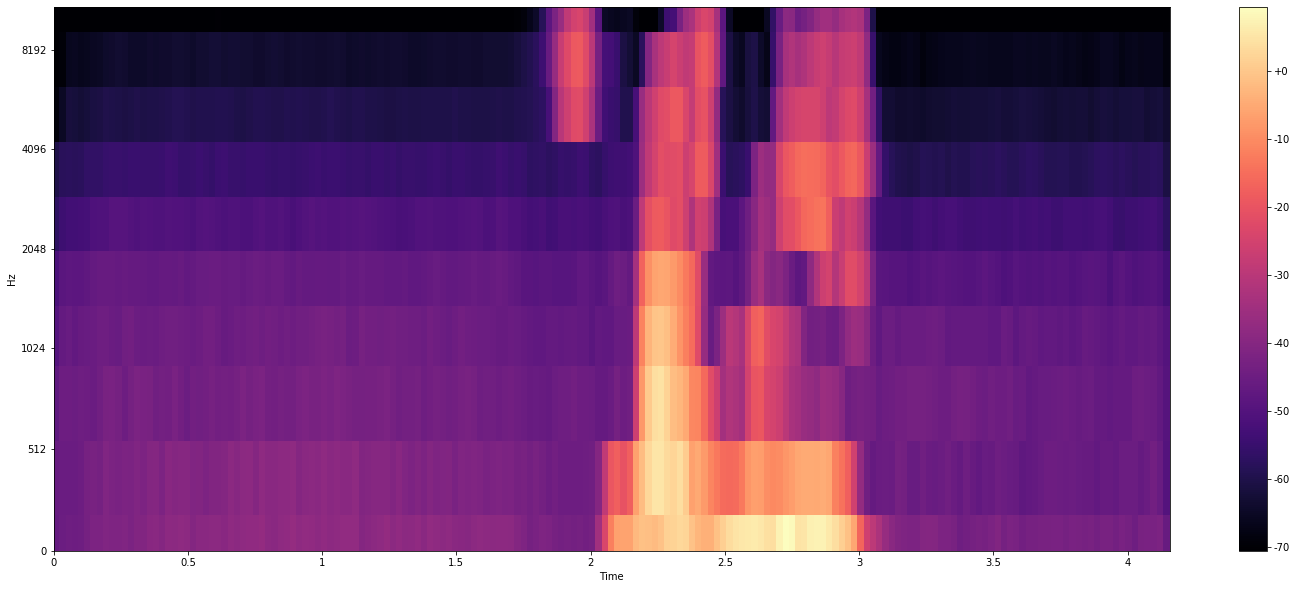

In [29]:
mel_spectrogram2()

# Time Domain Analysis

In [30]:
def time_domain_analysis():
    sample_duration = 1 / sr
    print(f"One sample lasts for {sample_duration:6f} seconds")
    tot_samples = len(audio)
    duration = 1 / sr * tot_samples
    print(f"The audio lasts for {duration} seconds")
    plt.figure(figsize=(12, 17))
    librosa.display.waveplot(audio, alpha=0.5)
    plt.title("Pakistan Audio")

One sample lasts for 0.000045 seconds
The audio lasts for 3.050702947845805 seconds


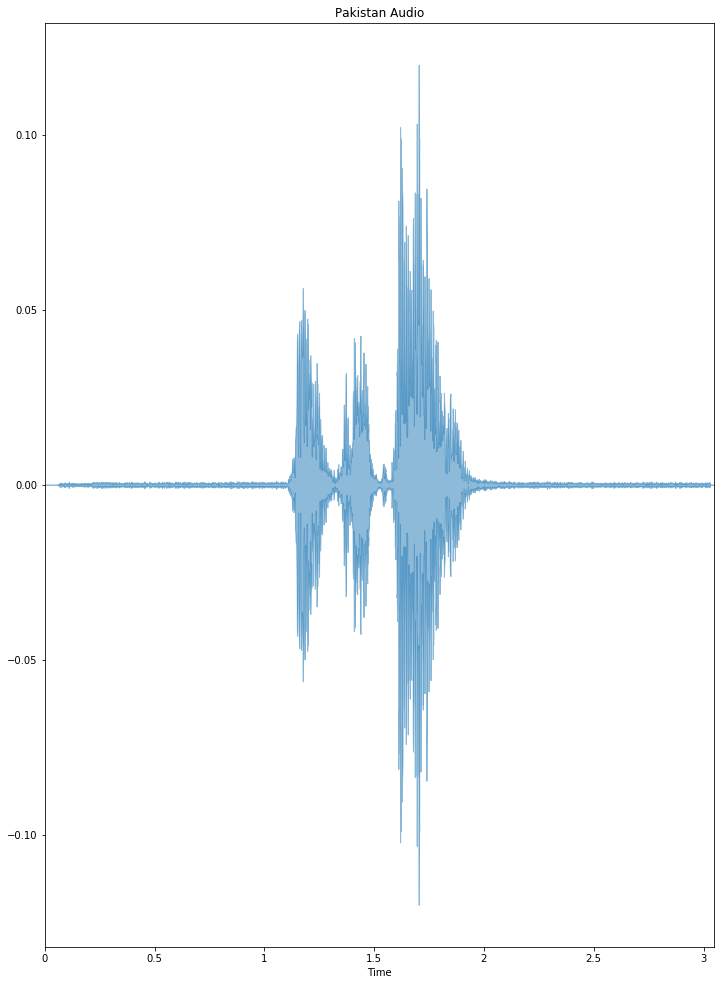

In [31]:
time_domain_analysis()

In [32]:
def time_domain_analysis_1():
    sample_duration = 1 / sr
    print(f"One sample lasts for {sample_duration:6f} seconds")
    tot_samples = len(audio2)
    duration = 1 / sr * tot_samples
    print(f"The audio lasts for {duration} seconds")
    plt.figure(figsize=(12, 17))
    librosa.display.waveplot(audio2, alpha=0.5)
    plt.title("Name Audio")

One sample lasts for 0.000045 seconds
The audio lasts for 4.138684807256236 seconds


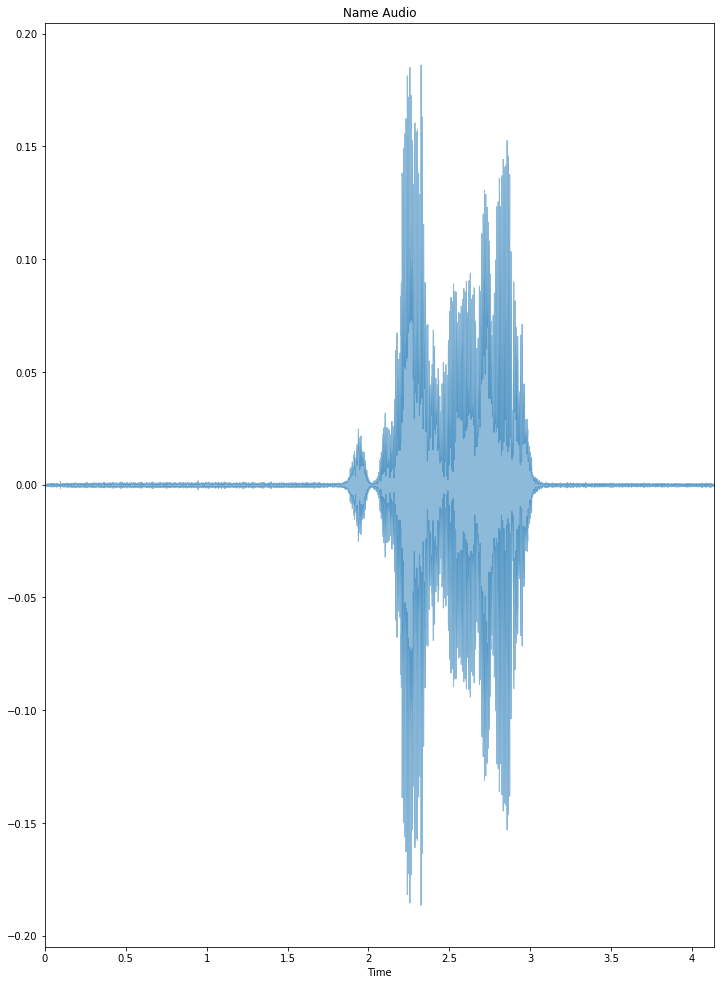

In [33]:
time_domain_analysis_1()